### Business Context

The real estate market in California is one of the most dynamic and competitive in the United States. Home prices vary widely depending on location, neighborhood quality, and other socio-economic factors. For buyers, understanding and predicting housing prices is crucial to making informed investment decisions. For sellers and real estate agents, accurate price predictions help in setting competitive listing prices, reducing the time a property stays on the market, and maximizing profit margins.

Investors, banks, and mortgage lenders also rely on house price predictions to assess loan risks, evaluate property values, and make financing decisions. With the growing demand for data-driven insights in the housing market, machine learning models like K-Nearest Neighbors (KNN) can provide valuable estimates of median house values. Accurate predictions can minimize financial risk, optimize investment strategies, and assist policy makers in monitoring housing affordability trends across different regions of California.

### Problem Definition

The California real estate market has experienced significant fluctuations in housing prices over the past few years, creating challenges for buyers, sellers, and investors alike. Many first-time buyers struggle to make informed purchasing decisions, while sellers and real estate agents often face difficulties in pricing properties competitively.

Currently, property valuation is largely based on traditional heuristics, expert opinions, or historical averages. However, these methods are often inefficient, non-scalable, and prone to error, leading to mispriced properties, prolonged sale cycles, and suboptimal investment decisions.

To address these challenges, there is a need for a data-driven solution that can predict median house prices based on key property and location features. By leveraging machine learning techniques like K-Nearest Neighbors (KNN) regression, stakeholders can obtain more accurate price estimates. This proactive, analytical approach aims to:

1. Enable buyers to make informed investment decisions

2. Help sellers and real estate agents price properties competitively

3. Assist investors and lenders in risk assessment and financing decisions

4. Improve overall market efficiency and reduce financial uncertainty

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('1553768847-housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.shape

(20640, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
#lets check for duplicated value
data.duplicated().sum()

0

### univariate analysis

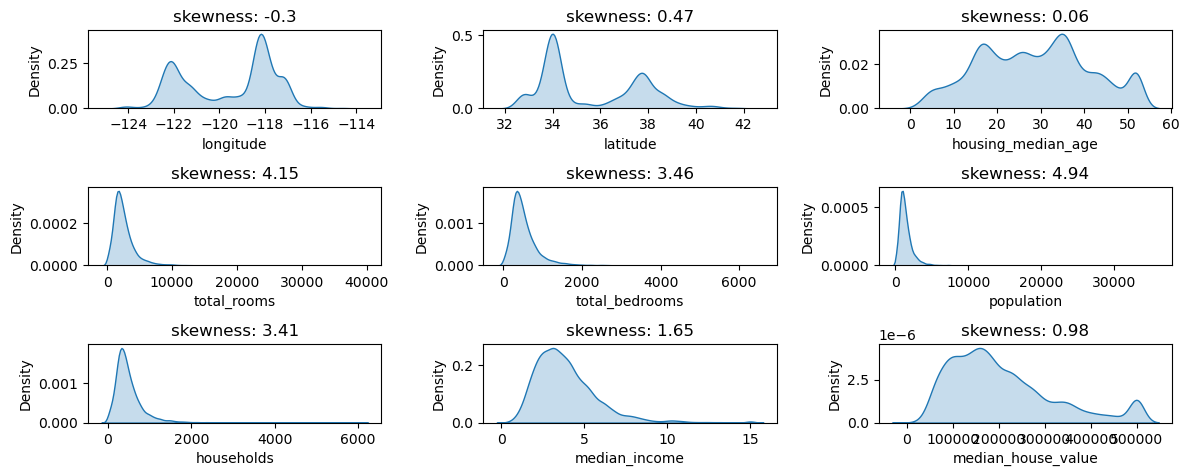

In [8]:
t = 1
plt.figure(figsize = (12,6))
for i in data.select_dtypes(include = 'number'):
    plt.subplot(4,3,t)
    sns.kdeplot(data[i],fill = True)
    plt.title(f'skewness: {round(data[i].skew(),2)}')
    t += 1
plt.tight_layout()
plt.show()

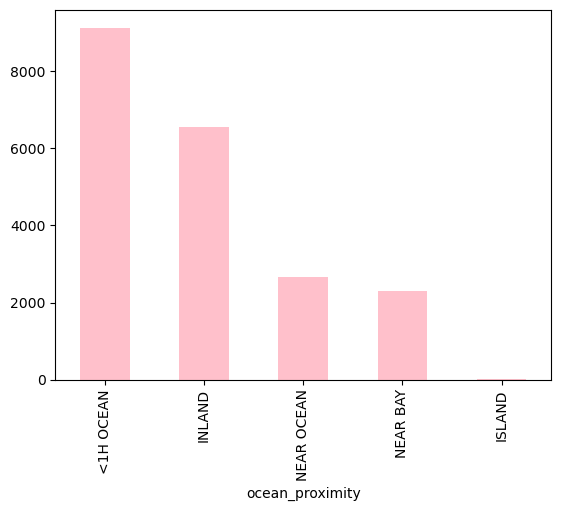

In [9]:
data['ocean_proximity'].value_counts().plot(kind = 'bar',color = 'pink')
plt.show()

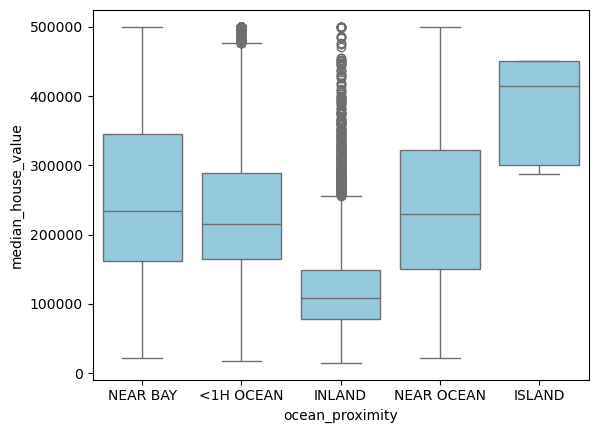

In [10]:
sns.boxplot(x = 'ocean_proximity',y = 'median_house_value',data = data,color = 'skyblue')
plt.show()

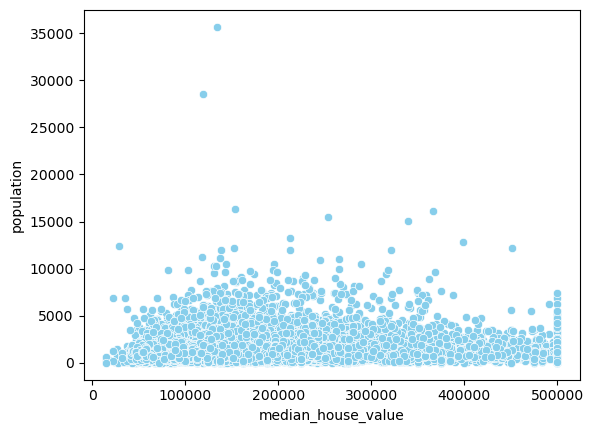

In [11]:
sns.scatterplot(y = 'population',x = 'median_house_value',data = data,color = 'skyblue')
plt.show()

### missing value treatment

In [13]:
data.isnull().sum()[data.isnull().sum() !=0]

total_bedrooms    207
dtype: int64

In [14]:
data[data['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


In [15]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace = True)

In [16]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Encode categorical data 

In [18]:
data = pd.get_dummies(data,columns = ['ocean_proximity'],drop_first = True,dtype = 'int')

### split dataset

In [20]:
x = data.drop('median_house_value',axis = 1)
y = data['median_house_value']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Base model :- RandomForest

In [23]:
model_rf = RandomForestRegressor()

In [24]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
y_pred = model_rf.predict(x_test)
y_pred_train = model_rf.predict(x_train)

In [26]:
print(f'train_score: {r2_score(y_train,y_pred_train)}')
print(f'test score: {r2_score(y_test,y_pred)}')

train_score: 0.9752945728765823
test score: 0.8111305403398776


### to overcome overfitting using more simpler model like KNN regressor

In [28]:
#there is clear sign of overfitting cause model score is too good on train data but not good on test data

In [29]:
#too overcome overfitting lets use more simple model like KNNregressor
#lets scale our data from using knn

### Standardize data 

In [31]:
scaler = StandardScaler()

In [32]:
#scalling for train 
x_train_scaled = x_train.iloc[:,:-4]
x_train_s = pd.DataFrame(scaler.fit_transform(x_train.iloc[:,:-4]),columns = x_train_scaled.columns,index = x_train_scaled.index)
x_train_scaled = x_train.iloc[:,-4:]
x_train_s = pd.concat([x_train_s,x_train_scaled],axis = 1).reset_index(drop = True)

In [33]:
#scalling for test
x_test_scaled = x_test.iloc[:,:-4]
x_test_s = pd.DataFrame(scaler.transform(x_test.iloc[:,:-4]),columns = x_test_scaled.columns,index = x_test_scaled.index)
x_test_scaled = x_test.iloc[:,-4:]
x_test_s = pd.concat([x_test_s,x_test_scaled],axis = 1).reset_index(drop = True)

In [34]:
model_kn = KNeighborsRegressor(n_neighbors = 10)

In [35]:
model_kn.fit(x_train_s,y_train)

KNeighborsRegressor(n_neighbors=10)

In [36]:
y_pred = model_kn.predict(x_test_s)
y_pred_train = model_kn.predict(x_train_s)

In [37]:
print(f'train_score: {r2_score(y_train,y_pred_train)}')
print(f'test score: {r2_score(y_test,y_pred)}')

train_score: 0.7833639800282518
test score: 0.7208869923427864
